In [1]:
library(RColorBrewer)

In [2]:
ncgr_nt_kmers <- read.table("../assembly_evaluation_data/unique_kmers_ncgr_nt.txt",header=TRUE,sep="\t")
colnames(ncgr_nt_kmers)<-c("SampleName","nt_unique_kmers")
head(ncgr_nt_kmers)

SampleName,nt_unique_kmers
MMETSP1403,14078915
MMETSP0292,10829338
MMETSP1316,10049557
MMETSP1042,20957422
MMETSP0228,49090117
MMETSP0944,23943500


In [3]:
dib_ncgr_kmers <- read.csv("../assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv")
dib_ncgr_kmers <- dib_ncgr_kmers[,c("SampleName","Phylum","dib_assembly_unique_kmers","ncgr_assembly_unique_kmers")]
dib_ncgr_kmers <- merge(dib_ncgr_kmers,ncgr_nt_kmers,by="SampleName")
unique_dammit_names <- read.csv("../assembly_evaluation_data/normalized_unique_gene_names_ncgr_dib.csv")
unique_dammit_names <- unique_dammit_names[,2:4]
colnames(unique_dammit_names) <- c("SampleName","NCGR_norm_unique_gene_names","DIB_norm_unique_gene_names")
unique_dammit_names <- merge(dib_ncgr_kmers,unique_dammit_names,by="SampleName")
head(unique_dammit_names)
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018",
                    "MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196",
                    "MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")
unique_dammit_names <- unique_dammit_names[!unique_dammit_names$SampleName %in% special_flowers,]

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names
MMETSP0007,Haptophyta,12496793,6672958,10776806,0.1553238,0.3038187
MMETSP0009,Bacillariophyta,30074483,17983358,24244646,0.1250278,0.2619097
MMETSP0011,Rhodophyta,19018154,8659798,13483086,0.1282602,0.3395015
MMETSP0018,Ciliophora,9666691,26864,7817848,0.5238095,0.9876067
MMETSP0040,Cercozoa,23878073,14826337,19815768,0.1054775,0.3242380
MMETSP0041,Cercozoa,22194734,8846735,9560866,0.1685256,0.3280542


In [4]:
# Only use 7 most common phyla
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")

In [5]:
#dib_ncgr_kmers <- dib_ncgr_kmers[!dib_ncgr_kmers$SampleName %in% special_flowers,]
dib_ncgr_kmers$sub_Phylum <- ifelse(dib_ncgr_kmers$Phylum %in% sub_phy, as.character(dib_ncgr_kmers$Phylum),"Others")

In [6]:
head(dib_ncgr_kmers)
dim(dib_ncgr_kmers)
dib_ncgr_kmers$sub_Phylum <- as.factor(dib_ncgr_kmers$sub_Phylum)
class(dib_ncgr_kmers$sub_Phylum)

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,sub_Phylum
MMETSP0004,Ochrophyta,19837761,9187479,10472571,Ochrophyta
MMETSP0005,Ochrophyta,20350054,8874387,10581349,Ochrophyta
MMETSP0006,Haptophyta,25286098,9558658,9945473,Haptophyta
MMETSP0007,Haptophyta,12496793,6672958,10776806,Haptophyta
MMETSP0008,Haptophyta,24682952,11925639,13046153,Haptophyta
MMETSP0008,Haptophyta,24682952,11925639,13046153,Haptophyta


[1] 703   6

[1] "factor"

In [7]:
summary(dib_ncgr_kmers$sub_Phylum)
colnames(dib_ncgr_kmers)
length(colnames(dib_ncgr_kmers))

Bacillariophyta     Chlorophyta      Ciliophora     Cryptophyta       Dinophyta 
            190              61              31              22             119 
     Haptophyta      Ochrophyta          Others 
             63              78             139

[1] "SampleName"                 "Phylum"                    
[3] "dib_assembly_unique_kmers"  "ncgr_assembly_unique_kmers"
[5] "nt_unique_kmers"            "sub_Phylum"

[1] 6

In [8]:
dib_ncgr_kmers <- dib_ncgr_kmers[,c(1,3:6)]
dib_ncgr_kmers$Phylum <- dib_ncgr_kmers$sub_Phylum

In [9]:
sort(unique(as.character(dib_ncgr_kmers$Phylum)))
dib_ncgr_kmers <- dib_ncgr_kmers[!duplicated(dib_ncgr_kmers$SampleName),]
dim(dib_ncgr_kmers)

[1] "Bacillariophyta" "Chlorophyta"     "Ciliophora"      "Cryptophyta"    
[5] "Dinophyta"       "Haptophyta"      "Ochrophyta"      "Others"

[1] 666   6

In [10]:
Cols = function(vec){
  #cols=cols=palette(brewer.pal(n=7,name="Dark2"))
  #cols=rainbow(length(unique(vec)))
  #cols = c('#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58')
  cols = palette(brewer.pal(n=8,name="Dark2"))
  return(cols[as.numeric(as.factor(vec))])}

pdf("../paper/figures/Figure6_unique_kmers.pdf",width=6.41,height=6.41)
png("../paper/figures/Figure6_unique_kmers.png",width=6.41,height=6.41,units="in",res=1200)
plot(dib_ncgr_kmers$ncgr_assembly_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),
     xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'cds' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),
     pch=19,
     frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=sort(unique(as.character(dib_ncgr_kmers$Phylum))),
       col=Cols(unique(as.character(dib_ncgr_kmers$Phylum))),
       cex=0.8, 
       pch=19,bty="n")
dev.off()
plot(dib_ncgr_kmers$ncgr_assembly_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),
     xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'cds' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),
     pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=sort(unique(as.character(dib_ncgr_kmers$Phylum))),col=Cols(sort(unique(as.character(dib_ncgr_kmers$Phylum))),cex=0.8, pch=19,bty="n")

ERROR: Error in parse(text = x, srcfile = src): <text>:33:0: unexpected end of input
31: abline(0,1)
32: legend(20,125000000,legend=sort(unique(as.character(dib_ncgr_kmers$Phylum))),col=Cols(sort(unique(as.character(dib_ncgr_kmers$Phylum))),cex=0.8, pch=19,bty="n")
   ^


pdf 
  2

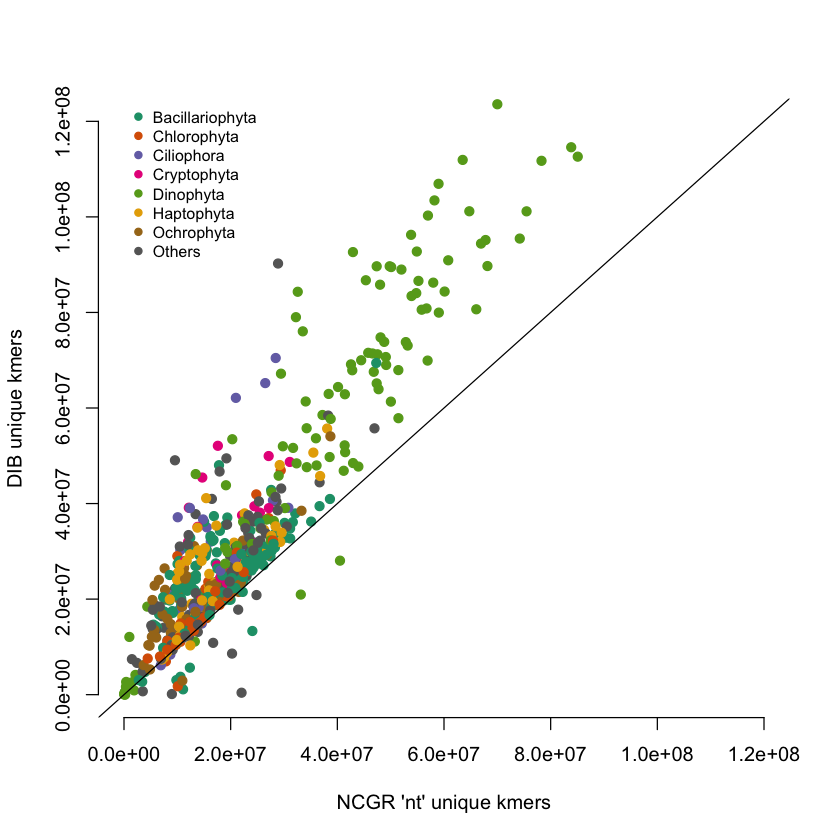

In [13]:
Cols = function(vec){
  #cols=cols=palette(brewer.pal(n=7,name="Dark2"))
  cols = palette(brewer.pal(n=8,name="Dark2"))
  #cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))])}
pdf("../paper/Figure4_unique_kmers.pdf",width=6.41,height=6.41)
#png("../paper/Figure4_unique_kmers.png",width=6.41,height=6.41,units="in",res=1200)
plot(dib_ncgr_kmers$nt_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'nt' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,
       legend=sort(unique(as.character(dib_ncgr_kmers$Phylum))),
       col=Cols(sort(unique(as.character(dib_ncgr_kmers$Phylum)))),
       cex=0.8, 
       pch=19,bty="n")
dev.off()
plot(dib_ncgr_kmers$nt_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'nt' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),
     pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=sort(unique(as.character(dib_ncgr_kmers$Phylum))),col=Cols(sort(unique(as.character(dib_ncgr_kmers$Phylum)))),cex=0.8, pch=19,bty="n")


In [14]:
dib_low<-dib_ncgr_kmers[which(dib_ncgr_kmers$dib_assembly_unique_kmers - dib_ncgr_kmers$nt_unique_kmers < 0),]
dib_low_unique<-dib_low[!duplicated(dib_low$SampleName),]
dim(dib_low_unique)
dib_low_unique

[1] 30  6

,SampleName,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,sub_Phylum,Phylum
30,MMETSP0045,8599174,16588847,20258710,Others,Others
43,MMETSP0088,3048248,7228650,9819310,Bacillariophyta,Bacillariophyta
49,MMETSP0092,3740431,7123883,10579641,Bacillariophyta,Bacillariophyta
73,MMETSP0113,17792090,13458714,21411239,Others,Others
75,MMETSP0115,10846327,16593047,16717201,Others,Others
84,MMETSP0121,20949606,31922723,33149899,Dinophyta,Dinophyta
101,MMETSP0152,19871282,14645491,19985406,Bacillariophyta,Bacillariophyta
111,MMETSP0169,13326017,19044174,24068069,Bacillariophyta,Bacillariophyta
119,MMETSP0196,896691,1430197,1896042,Dinophyta,Dinophyta
143,MMETSP0229,75019,35307,98008,Dinophyta,Dinophyta


In [15]:
dim(dib_ncgr_kmers)
test<-dib_ncgr_kmers[!duplicated(dib_ncgr_kmers$SampleName),]
dim(test)

[1] 666   6

[1] 666   6

# Figure 7

In [16]:
head(unique_dammit_names)
dim(unique_dammit_names)

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names
MMETSP0007,Haptophyta,12496793,6672958,10776806,0.1553238,0.3038187
MMETSP0009,Bacillariophyta,30074483,17983358,24244646,0.1250278,0.2619097
MMETSP0011,Rhodophyta,19018154,8659798,13483086,0.1282602,0.3395015
MMETSP0018,Ciliophora,9666691,26864,7817848,0.5238095,0.9876067
MMETSP0040,Cercozoa,23878073,14826337,19815768,0.1054775,0.3242380
MMETSP0041,Cercozoa,22194734,8846735,9560866,0.1685256,0.3280542


[1] 286   7

In [17]:
unique_dammit_names$sub_Phylum <- ifelse(unique_dammit_names$Phylum %in% sub_phy, as.character(unique_dammit_names$Phylum),"Others")

In [18]:
head(unique_dammit_names)
dim(unique_dammit_names)
unique_dammit_names$sub_Phylum <- as.factor(unique_dammit_names$sub_Phylum)
class(unique_dammit_names$sub_Phylum)

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names,sub_Phylum
MMETSP0007,Haptophyta,12496793,6672958,10776806,0.1553238,0.3038187,Haptophyta
MMETSP0009,Bacillariophyta,30074483,17983358,24244646,0.1250278,0.2619097,Bacillariophyta
MMETSP0011,Rhodophyta,19018154,8659798,13483086,0.1282602,0.3395015,Others
MMETSP0018,Ciliophora,9666691,26864,7817848,0.5238095,0.9876067,Ciliophora
MMETSP0040,Cercozoa,23878073,14826337,19815768,0.1054775,0.3242380,Others
MMETSP0041,Cercozoa,22194734,8846735,9560866,0.1685256,0.3280542,Others


[1] 286   8

[1] "factor"

In [19]:
summary(unique_dammit_names$sub_Phylum)
colnames(unique_dammit_names)
length(colnames(unique_dammit_names))

Bacillariophyta     Chlorophyta      Ciliophora     Cryptophyta       Dinophyta 
             83              38              11               6              25 
     Haptophyta      Ochrophyta          Others 
             24              34              65

[1] "SampleName"                  "Phylum"                     
[3] "dib_assembly_unique_kmers"   "ncgr_assembly_unique_kmers" 
[5] "nt_unique_kmers"             "NCGR_norm_unique_gene_names"
[7] "DIB_norm_unique_gene_names"  "sub_Phylum"

[1] 8

In [20]:
unique_dammit_names <- unique_dammit_names[,c(1,3:8)]
unique_dammit_names$Phylum <- unique_dammit_names$sub_Phylum

pdf 
  2

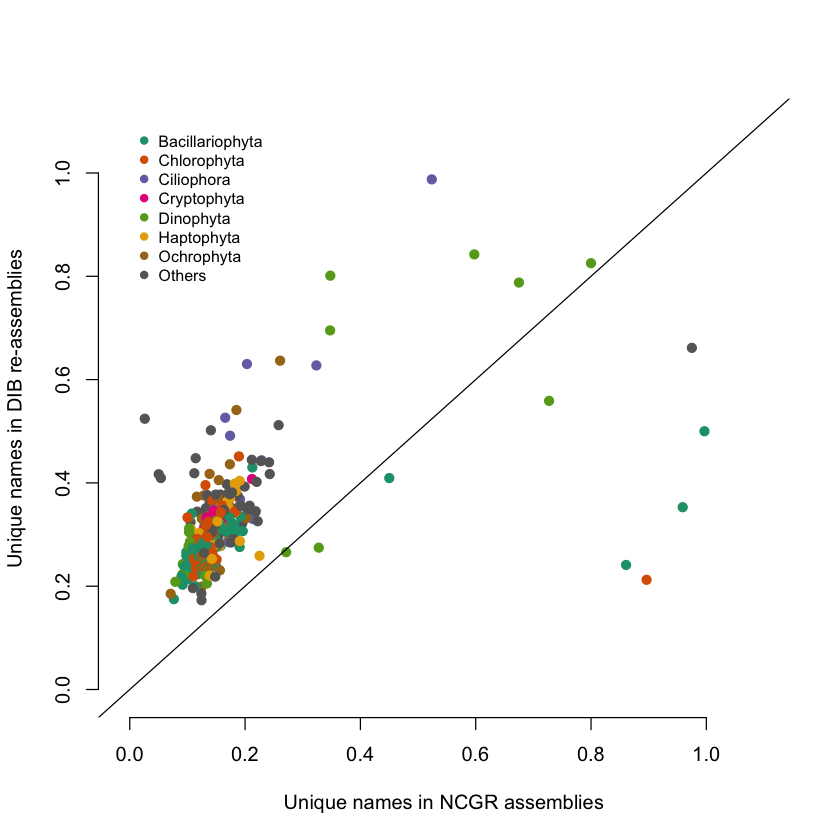

In [21]:
Cols = function(vec){
  #cols=palette(brewer.pal(n=7,name="Dark2"))
  #cols=rainbow(length(unique(vec)))
  cols = palette(brewer.pal(n=8,name="Dark2"))
  return(cols[as.numeric(as.factor(vec))])}

pdf("../paper/Figure7_unique_gene_names.pdf")
#png("../paper/Figure7_unique_gene_names.png",width=6.41,height=6.41,units="in",res=1200)
plot(unique_dammit_names$NCGR_norm_unique_gene_names,unique_dammit_names$DIB_norm_unique_gene_names,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),
     col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,
     ylab = "Unique names in DIB re-assemblies",
     xlab="Unique names in NCGR assemblies",
     frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=sort(unique(as.character(unique_dammit_names$Phylum))),
       col=Cols(sort(unique(as.character(unique_dammit_names$Phylum)))),
       cex=0.8, pch=19,bty="n")
dev.off()
plot(unique_dammit_names$NCGR_norm_unique_gene_names,unique_dammit_names$DIB_norm_unique_gene_names,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),
     col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,
     ylab = "Unique names in DIB re-assemblies",
     xlab="Unique names in NCGR assemblies",
     frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=sort(unique(as.character(unique_dammit_names$Phylum))),col=Cols(sort(unique(as.character(unique_dammit_names$Phylum)))),cex=0.8, pch=19,bty="n")

In [32]:
head(unique_dammit_names)
dim(unique_dammit_names)

SampleName,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names,sub_Phylum,Phylum
MMETSP0007,12496793,6672958,10776806,0.1553238,0.3038187,Haptophyta,Haptophyta
MMETSP0009,30074483,17983358,24244646,0.1250278,0.2619097,Bacillariophyta,Bacillariophyta
MMETSP0011,19018154,8659798,13483086,0.1282602,0.3395015,Others,Others
MMETSP0018,9666691,26864,7817848,0.5238095,0.9876067,Ciliophora,Ciliophora
MMETSP0040,23878073,14826337,19815768,0.1054775,0.3242380,Others,Others
MMETSP0041,22194734,8846735,9560866,0.1685256,0.3280542,Others,Others


[1] 286   8

## NCGR annotations higher (outliers)

In [33]:
low <- unique_dammit_names$DIB_norm_unique_gene_names - unique_dammit_names$NCGR_norm_unique_gene_names
unique_dammit_names_dib_low <-unique_dammit_names[which(unique_dammit_names$DIB_norm_unique_gene_names - unique_dammit_names$NCGR_norm_unique_gene_names < 0),]
dim(unique_dammit_names_dib_low)
unique_dammit_names_dib_low

[1] 9 8

,SampleName,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names,sub_Phylum,Phylum
38,MMETSP0169,13326017,19044174,24068069,0.4501192,0.4093184,Bacillariophyta,Bacillariophyta
56,MMETSP0232,132393,2860061,8976079,0.9748985,0.6614420,Others,Others
70,MMETSP0378,14605780,11445573,13278318,0.2712076,0.2657631,Dinophyta,Dinophyta
71,MMETSP0380,11119805,11445573,13278318,0.3277611,0.2746512,Dinophyta,Dinophyta
134,MMETSP0912,19404580,11804455,16943837,0.8607947,0.2411168,Bacillariophyta,Bacillariophyta
143,MMETSP0937,10191377,7305196,7833149,0.8963239,0.2124183,Chlorophyta,Chlorophyta
178,MMETSP1057,32859038,21832441,30329665,0.9590082,0.3529412,Bacillariophyta,Bacillariophyta
214,MMETSP1148,24642,15928,57287,0.7272727,0.5588235,Dinophyta,Dinophyta
276,MMETSP1412,29732268,21154160,24989616,0.9967450,0.5000000,Bacillariophyta,Bacillariophyta


# What is the average percentage (± stdev) of newly-assembled contigs that annotated to a database (Pfam, Rfam, and OrthoDB)

In [34]:
num_contigs = read.csv("../assembly_evaluation_data/annotation_stats.csv")
dib_contig_nums = read.csv("../assembly_evaluation_data/transrate_reference_scores_cds.csv")
ncgr_contig_nums = read.csv("../assembly_evaluation_data/transrate_imicrobe_scores.csv")

In [35]:
num_contigs_sub = num_contigs[,c(1,2,3)]
contigs = dib_contig_nums[,c(2,44)]
colnames(num_contigs_sub) <- c("MMETSP","total_annotated_contigs","unique_anotations")
colnames(contigs)<-c("n_contigs","MMETSP")

In [36]:
num_contigs_new <- merge(num_contigs_sub,contigs,by="MMETSP")
num_contigs_new <- num_contigs_new[!num_contigs_new$MMETSP %in% special_flowers,]

In [37]:
head(num_contigs_new)

,MMETSP,total_annotated_contigs,unique_anotations,n_contigs
1,MMETSP0004,26851,12707,31798
2,MMETSP0005,26252,12246,30447
3,MMETSP0006,36795,17810,42819
4,MMETSP0007,17308,7773,26600
7,MMETSP0009,36990,12576,47658
8,MMETSP0010,35765,14801,35648


In [38]:
average_perc_annotated = mean(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)
average_perc_unique_annotated = mean(num_contigs_new$unique_anotations/num_contigs_new$n_contigs)

In [39]:
mean(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)

[1] 0.9106026

In [40]:
sd(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)

[1] 1.581437

In [41]:
mean(num_contigs_new$unique_anotations/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.4526137

In [42]:
sd(num_contigs_new$unique_anotations/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.8732772

In [43]:
head(ncgr_contig_nums)

assembly,SampleName,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,⋯,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0909.cds.fa.fixed.fa,MMETSP0909,17793,150,5295,13335459,726.3241,2371,4918,0,⋯,0.62997,73,0.00410,2864,0.16096,5822,0.32721,0.08002,0.08486,0.02586
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP1138.cds.fa.fixed.fa,MMETSP1138,21907,150,13716,22494042,1016.9273,1248,8959,4,⋯,0.75834,3558,0.16241,11314,0.51646,621,0.02835,0.15532,0.29205,0.46644
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0317.cds.fa.fixed.fa,MMETSP0317,10424,150,14124,12824577,1225.5069,287,5182,5,⋯,0.68314,1624,0.15579,4927,0.47266,142,0.01362,0.29773,0.48681,0.45753
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0370.cds.fa.fixed.fa,MMETSP0370,54971,150,7545,41366781,725.2256,8621,15861,0,⋯,0.67985,291,0.00529,21782,0.39625,2127,0.03869,0.17398,0.24414,0.41163
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP1412.cds.fa.fixed.fa,MMETSP1412,14977,150,11460,19276146,1275.2630,1015,7611,2,⋯,0.66075,43,0.00287,3505,0.23403,1752,0.11698,0.22650,0.25427,0.32807
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0527.cds.fa.fixed.fa,MMETSP0527,69295,150,14601,78969480,1126.2404,5335,30963,43,⋯,0.76190,8868,0.12797,40461,0.58389,1478,0.02133,0.22165,0.39974,0.52570


In [44]:
false_crbb <- num_contigs[,c(1,4)]
colnames(false_crbb)<-c("MMETSP","annotations_w_false_crbb")
false_crbb <- false_crbb[!false_crbb$MMETSP %in% special_flowers,]
num_contigs_new <- merge(num_contigs_new,false_crbb,by="MMETSP")

In [45]:
head(num_contigs_new)

MMETSP,total_annotated_contigs,unique_anotations,n_contigs,annotations_w_false_crbb
MMETSP0004,26851,12707,31798,2246
MMETSP0005,26252,12246,30447,1748
MMETSP0006,36795,17810,42819,4691
MMETSP0007,17308,7773,26600,1368
MMETSP0009,36990,12576,47658,NA
MMETSP0010,35765,14801,35648,3675


In [46]:
mean(num_contigs_new$annotations_w_false_crbb/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.07884789

In [47]:
sd(num_contigs_new$annotations_w_false_crbb/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.1942385

# What happened to the low unique *k*-mers in Figure 6?

In [48]:
dib_low<-dib_ncgr_kmers[which(dib_ncgr_kmers$Unique_kmers_assembly < 1000000),]
dim(dib_low)
head(dib_low)

[1] 0 6

SampleName,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,sub_Phylum,Phylum


In [49]:
ncgr_greater<-dib_low[which(dib_low$Unique_kmers_assembly<dib_low$Unique_kmers),]
dim(ncgr_greater)
ncgr_greater

[1] 0 6

SampleName,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,sub_Phylum,Phylum
